# **- Starter Code**

In [1]:
#Starter Code
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib 

# **- Given Functions**

In [12]:
#Function 1: Given an image, returns the image and it's squared version in array format
def toArrayAndSquare(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] ** 2
  return img,sqr

#Function 2: Given an image, applies a certain threshold
def applyThreshold (im, th):
  res = [[0 for x in range(len(im[0]))] for y in range(len(im))]
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      if(im[i][j]<th):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return res

# **Task 2**

In [87]:
def integralArray(img):
    print()
    rows, columns = len(img), len(img[0])
    s = [ [ 0 for y in range(columns) ] for x in range(rows) ]
    integral_image = [ [ 0 for y in range(columns) ] for x in range(rows) ]
    # calculating s matrix
    for i in range(0, rows):
        sum = 0
        for j in range(0, columns):
            sum += img[i][j]
            s[i][j] = sum
    # calculating integral matrix
    for i in range(0, rows):
        for j in range(0, columns):
            if (i == 0):
                integral_image[i][j] = s[i][j]
            else:
                integral_image[i][j] = integral_image[i-1][j] + s[i][j]
    return integral_image            

In [94]:
def localSum(integral, tL_i, tL_j, bR_i, bR_j):
    upper_sum = 0
    left_sum =  0
    if (tL_i > 0):
        upper_sum = integral[tL_i-1][bR_j]
    if (tL_j > 0):
        left_sum =  integral[bR_i][tL_j-1]   
    return integral[bR_i][bR_j] - upper_sum - left_sum + integral[tL_i-1][tL_j-1]


In [96]:
import math
def imgWithIntegral(image , window_w, window_h):
    img, sqr = toArrayAndSquare(image)
    integral = integralArray(img)
    sqr_integral = integralArray(sqr)
    rows, columns = len(img), len(img[0])
    var = [ [ 0 for y in range(columns) ] for x in range(rows) ]
    n = window_w*window_h
    start_row = int(window_h // 2)
    start_column = int(window_w //2)
    row_difference = int((window_w - start_row)/2)
    column_difference = int((window_h - start_column)/2)
    end_row = int(rows - row_difference)
    end_column = int(columns - column_difference)

    for i in range(start_row, end_row):
        for j in range(start_column, end_column):
            localSquaredSum = localSum(sqr_integral,i-row_difference, j-column_difference, i+row_difference, j+column_difference )
            localIntegralSum = localSum(integral, i-row_difference, j-column_difference, i+row_difference, j+column_difference )    
            variance = (1/n)*localSquaredSum - math.pow(((1/n)* localIntegralSum),2)
            if (variance >=0):
                var[i][j] = variance 
    return var            
    
    

In [116]:
def threshold(image_matrix, threshold):
    matrix = [row[:] for row in image_matrix]
    for i in range(0, len(matrix)):
        for j in range(0, len(matrix[0])):
            if matrix[i][j]>threshold:
                matrix[i][j] =  100000
            else:
                 matrix[i][j] =  0   
    return matrix              

In [117]:
image1 = Image.open("sample_image.jpg").convert("L") 
img,sqr = toArrayAndSquare(image1)
integral = integralArray(img)
integral_sqr = integralArray(sqr)
edge_detected = imgWithIntegral(image1,3,3 )
edge_detected_threshold = threshold(edge_detected, 750)

# **Plotting 6 images in a 3x2 bounding box in gray-scale mode**

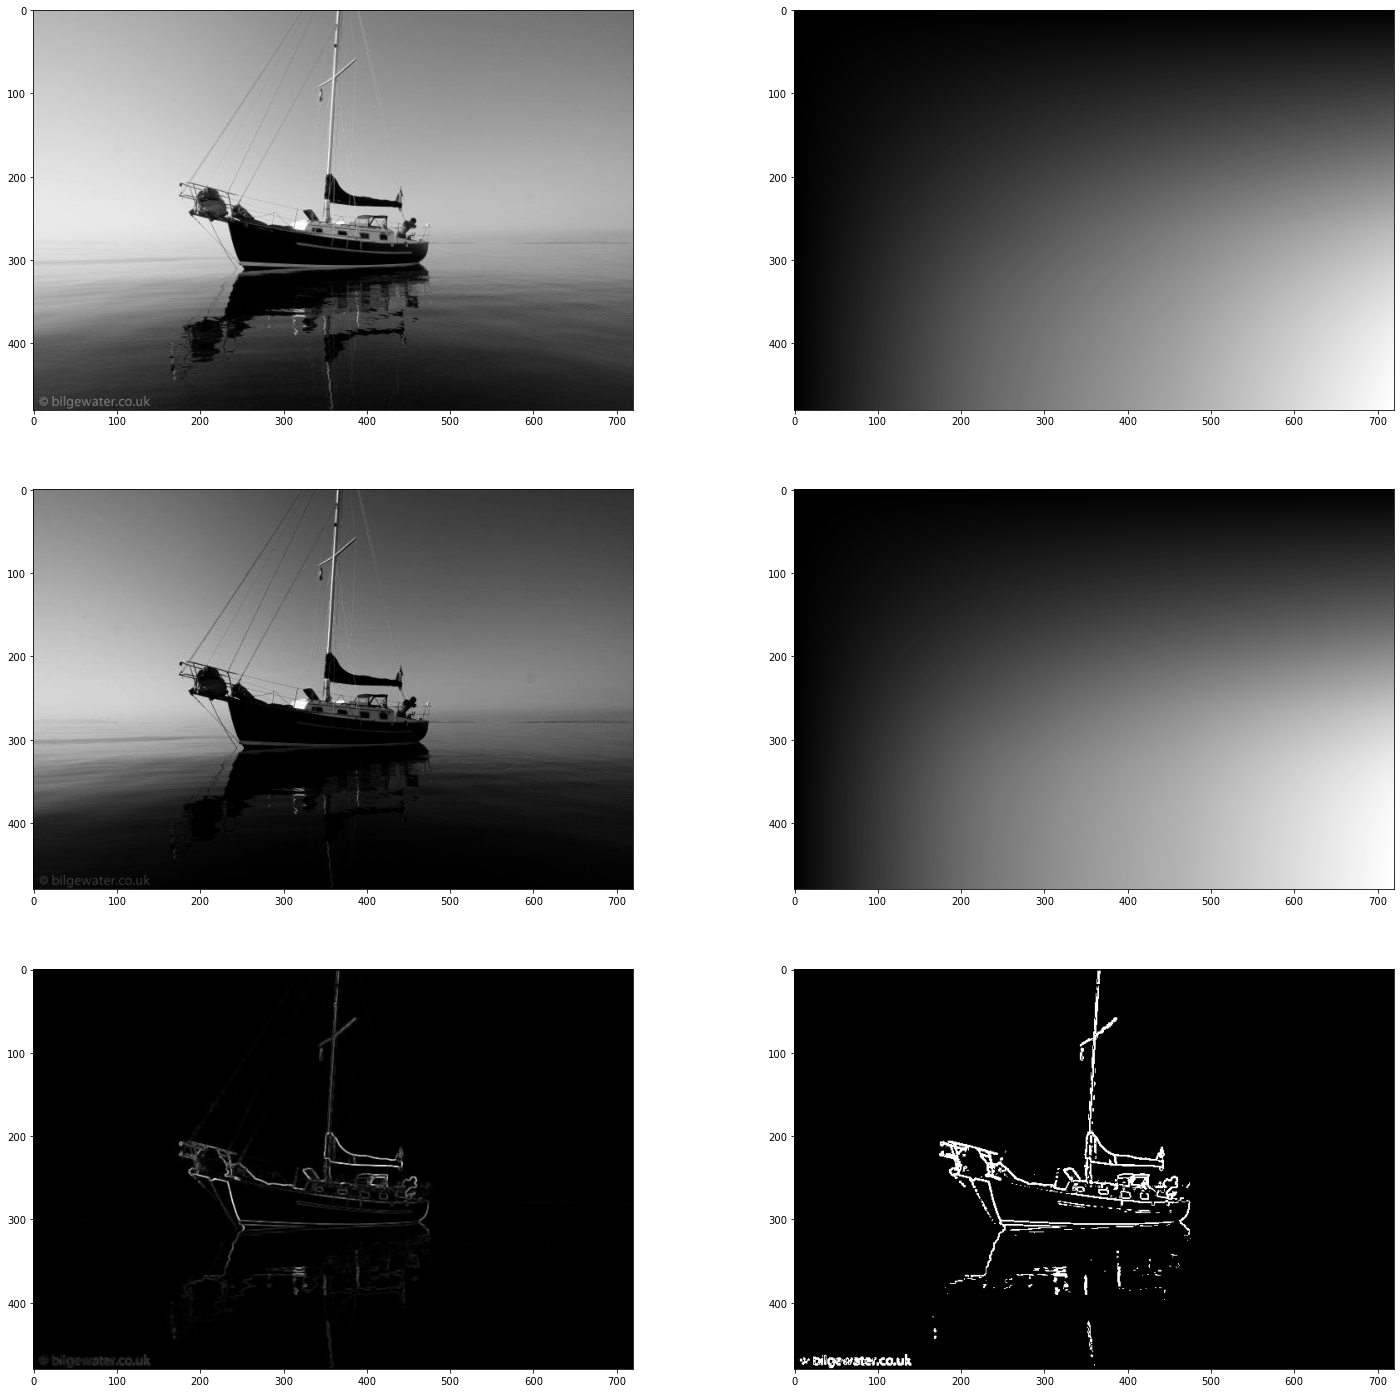

In [118]:

#plt has to be imported, see the previous sections
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(image1,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(integral,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(sqr,  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(integral_sqr,  cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(edge_detected,  cmap = 'gray')

plt.subplot(3,2,6)
plt.imshow(edge_detected_threshold,  cmap = 'gray')